# **Capstone Project**

**Problem Statement 1:**

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply

**Dataset Information:**

**The walmart.csv contains 6435 rows and 8 columns.**

**Feature Name Description**

Store        - Store number

Date         - Week of Sales

Weekly_Sales - Sales for the given store in that week

Holiday_Flag - If it is a holiday week

Temperature  - Temperature on the day of the sale

Fuel_Price   - Cost of the fuel in the region

CPI          - Consumer Price Index

Unemployment - Unemployment Rate

**1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:**

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
data = pd.read_csv('/content/Walmart (1).csv')

In [8]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [21]:
# Data preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

In [17]:
# Basic Statistics
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          3870 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          3870 non-null   float64       
 9   Month         3870 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 502.9 KB
None


In [11]:
# Check for missing values
print(data.isnull().sum())

Store              0
Date            2565
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
dtype: int64


In [24]:
# Handling missing values in the 'Date' column by forward filling
data['Date'] = data['Date'].ffill()

# Optionally, handle missing values in 'Year' and 'Month' columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month


In [28]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,NaT,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN
1,1,NaT,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010.0,2.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010.0,2.0
4,1,2010-02-26,1554806.68,0,46.50,2.625,211.350143,8.106,2010.0,2.0


In [29]:
# Check for missing values
print(data.isnull().sum())

Store           0
Date            2
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            2
Month           2
dtype: int64


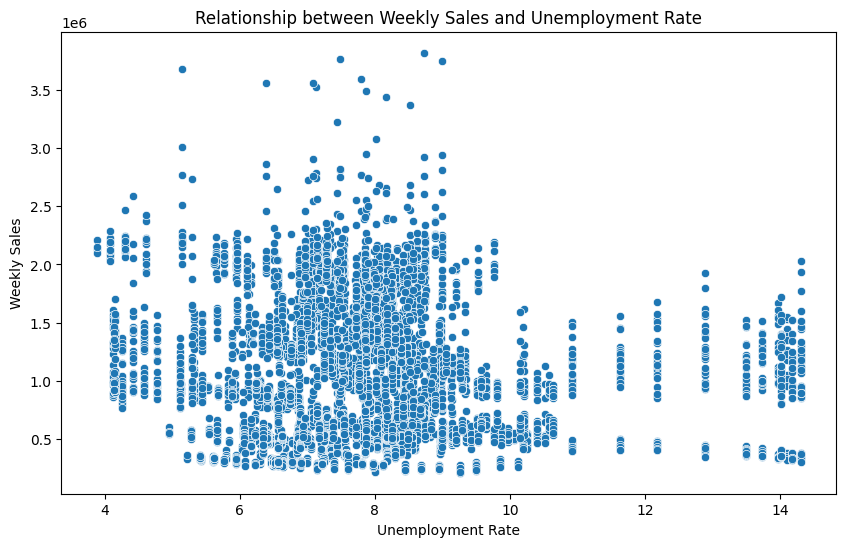

Stores most affected by unemployment rate:
       Unemployment  Weekly_Sales
Store                            
28        13.116483  1.323522e+06
38        13.116483  3.857317e+05
12        13.116483  1.009002e+06
43         9.934804  6.333247e+05
34         9.934804  9.667816e+05


In [31]:
#a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
# Statistical analysis - correlation between Weekly Sales and Unemployment Rate
correlation = data['Weekly_Sales'].corr(data['Unemployment'])

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Relationship between Weekly Sales and Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

# Identify stores most affected by unemployment rate
unemployment_effect = data.groupby('Store')['Unemployment'].mean()
sales_effect = data.groupby('Store')['Weekly_Sales'].mean()
store_effect = pd.concat([unemployment_effect, sales_effect], axis=1)
store_effect = store_effect.sort_values(by='Unemployment', ascending=False)
print("Stores most affected by unemployment rate:")
print(store_effect.head())


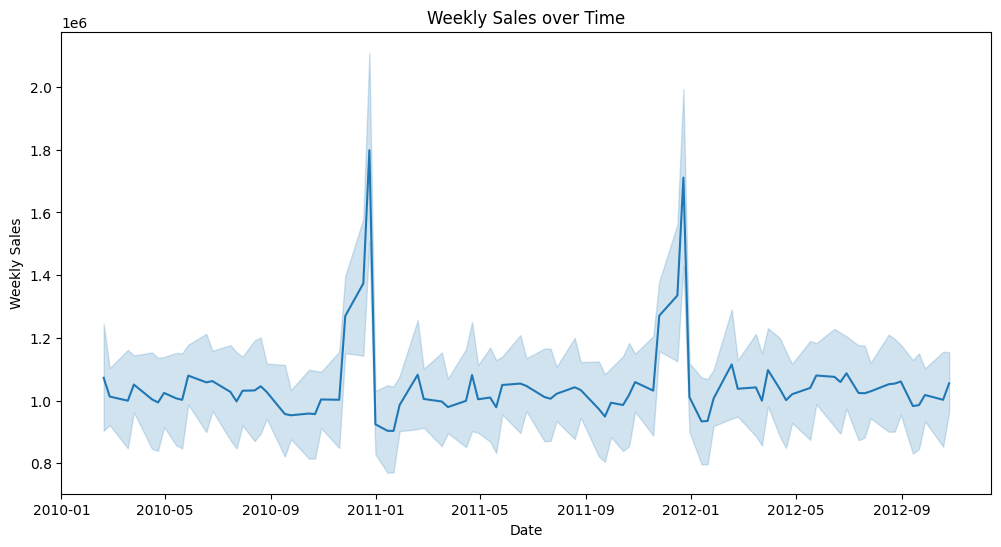

<Figure size 1200x600 with 0 Axes>

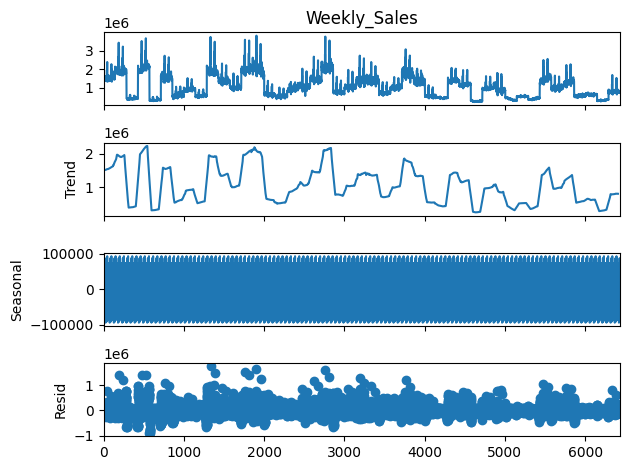

Summary:
- Line plot: trend of weekly sales over time.
- Seasonal decomposition plot: insights into seasonal components.
- Peaks and troughs may indicate specific periods like holidays or promotions.
- Helps identify reasons behind fluctuations in weekly sales.


In [47]:
# Visualize weekly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Weekly_Sales'], model='additive', period=52)
plt.figure(figsize=(12, 6))
decomposition.plot()
plt.show()

# Summary
print("Summary:")
print("- Line plot: trend of weekly sales over time.")
print("- Seasonal decomposition plot: insights into seasonal components.")
print("- Peaks and troughs may indicate specific periods like holidays or promotions.")
print("- Helps identify reasons behind fluctuations in weekly sales.")



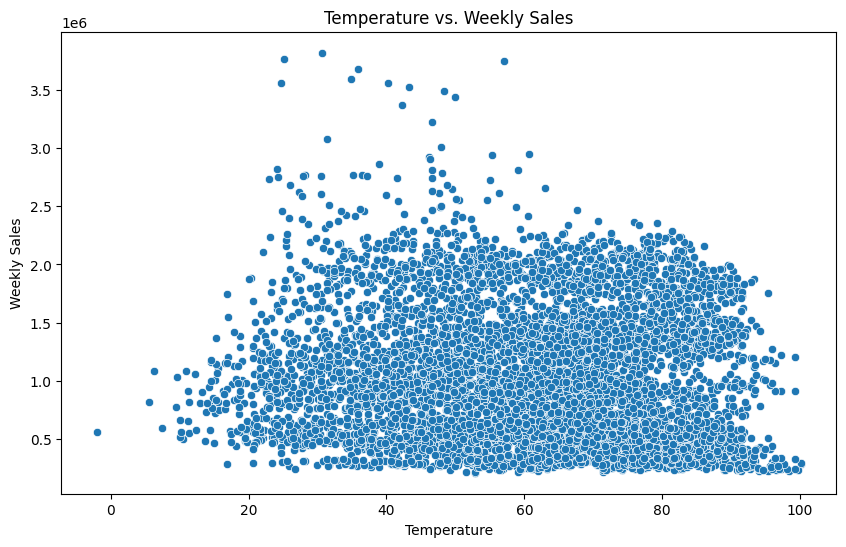

Summary:
- There's a correlation between temperature and weekly sales.
- Correlation coefficient: -0.06381001317946956
- Changes in temperature may influence weekly sales.


In [46]:
# c. Does temperature affect the weekly sales in any manner?
# Visualize temperature vs. weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Correlation between temperature and weekly sales
correlation_temp = data['Weekly_Sales'].corr(data['Temperature'])

# Summary
print("Summary:")
print("- There's a correlation between temperature and weekly sales.")
print("- Correlation coefficient:", correlation_temp)
print("- Changes in temperature may influence weekly sales.")

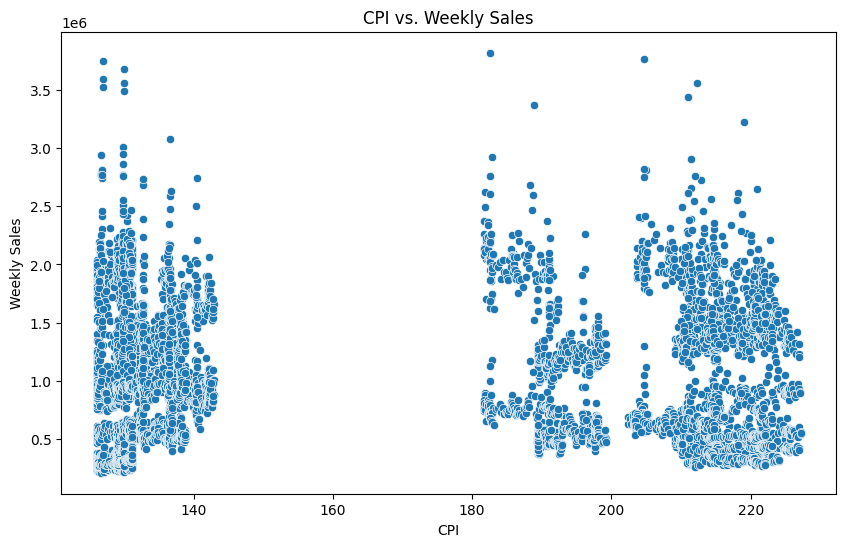

Summary:
- There's a correlation between CPI and weekly sales.
- Correlation coefficient: -0.07263416204017631
- CPI may impact weekly sales, further analysis needed.


In [45]:
#d. How is the Consumer Price index affecting the weekly sales of various stores?
# Visualize CPI vs. weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# Correlation between CPI and weekly sales
correlation_cpi = data['Weekly_Sales'].corr(data['CPI'])

# Summary
print("Summary:")
print("- There's a correlation between CPI and weekly sales.")
print("- Correlation coefficient:", correlation_cpi)
print("- CPI may impact weekly sales, further analysis needed.")

In [35]:
#e. Top performing stores according to the historical data.
# Top performing stores based on historical data
top_stores = data.groupby('Store')['Weekly_Sales'].sum().nlargest(5)
print("Top performing stores:")
print(top_stores)


Top performing stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [36]:
#f. The worst performing store, and how significant is the difference between the highest and lowest performing stores
# Worst performing store based on historical data
worst_store = data.groupby('Store')['Weekly_Sales'].sum().idxmin()
print("Worst performing store:", worst_store)

# Calculating the difference between highest and lowest performing stores
highest_sales = data.groupby('Store')['Weekly_Sales'].sum().max()
lowest_sales = data.groupby('Store')['Weekly_Sales'].sum().min()
difference = highest_sales - lowest_sales
print("Difference between highest and lowest performing stores:", difference)


Worst performing store: 33
Difference between highest and lowest performing stores: 264237570.49999997


# **# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.:**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Suppress warnings
warnings.filterwarnings('ignore')

# Parameters for the ARIMA model
p = 1  # AR term
d = 1  # Differencing term
q = 1  # MA term

# Forecasting for the next 12 weeks for each store
future_forecasted_sales = {}
for store in data['Store'].unique():
    store_data = data[data['Store'] == store]['Weekly_Sales']

    # Train-test split
    train_size = int(len(store_data) * 0.8)
    train, test = store_data[:train_size], store_data[train_size:]

    # Fit the model on the entire dataset
    model = SARIMAX(train, order=(p, d, q), seasonal_order=(1, 1, 1, 52))
    model_fit = model.fit(disp=False)

    # Forecast for the next 12 weeks
    forecast = model_fit.forecast(steps=12)
    future_forecasted_sales[store] = forecast

# Visualization of future forecasts with individual graphs for each store
stores = list(future_forecasted_sales.keys())
n_stores = len(stores)
n_cols = 2
n_rows = (n_stores + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, (store, forecast) in enumerate(future_forecasted_sales.items()):
    store_data = data[data['Store'] == store]['Weekly_Sales']
    axes[i].plot(store_data.index, store_data, label='Historical Sales')
    axes[i].plot(forecast.index, forecast, label='Forecast', color='red')
    axes[i].set_title(f'Store {store} Sales Forecast for Next 12 Weeks')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Weekly Sales')
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


KeyboardInterrupt: 